In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
import numpy as np
from numpy.random import default_rng
from material1D import ElasticMaterial1D, PerfectPlasticMaterial1D, DamageMaterial1D, PlasticHardeningMaterial1D
from material3D import EOSMaterial,PerfectPlasticMaterial, YieldFunction, DruckerPragerYieldFunction

# Material models

## Uniaxial damage model

We assume a material to consist of "fibers" that are perfectly brittle, meaning they instantly fail at a critical point. But since not all fibers fail at the same time, we have a reduction of affected area. For $t=0$ we have $A_0=A$ and for a $t_\mathrm{end}$ we have $A_\mathrm{end}=0$. We get the effective stress

$$\bar\sigma = \frac {A}{\bar A} \sigma.$$

We define a damage parameter

$$\omega = 1-\frac{\bar A}{A}$$

$$\bar \sigma =E\varepsilon$$

$$\sigma =(1-\omega)E\varepsilon$$

The damage parameter depends on the strain $\omega =g(\varepsilon)$

## Perfect Plastic Model
Todo: Introduction to plastic models

## Monotonic loading

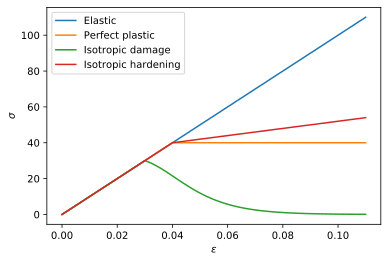

In [2]:
e=np.linspace(0,0.11,100)        
E = 1000
s_yield = 40
#f = lambda s:s-np.log(s+1)*15
#df = lambda s:1-1/(s+1)
#ddf= lambda s:1/(s+1)**2
f = lambda s:s-s_yield
df = lambda s:1
ddf= lambda s:0

el_damage = DamageMaterial1D(E,0.03)
sigma_damage = [el_damage(ei) for ei in e]
el = ElasticMaterial1D(E)
sigma_el = [el(ei) for ei in e]
pl = PerfectPlasticMaterial1D(E, f, df ,ddf)
sigma_pl = [pl(ei) for ei in e]
pl_hard = PlasticHardeningMaterial1D(E, 250, 40)
sigma_pl_hard = [pl_hard(ei) for ei in e]


plt.plot(e,sigma_el,label="Elastic")
plt.plot(e,sigma_pl,label="Perfect plastic")
plt.plot(e,sigma_damage,label="Isotropic damage")
plt.plot(e,sigma_pl_hard,label="Isotropic hardening")
plt.xlabel(r"$ \varepsilon $")
plt.ylabel(r"$\sigma$")
plt.legend()
plt.show()

## Non monotonic loading (Damage model)

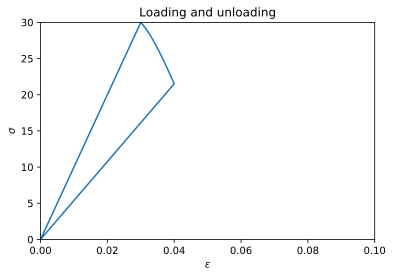

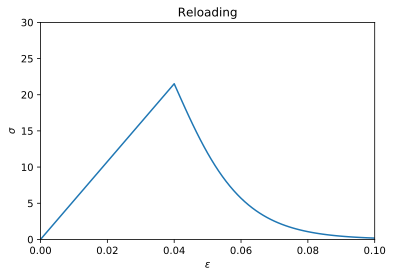

In [3]:
e_unloading = np.concatenate((np.linspace(0,0.04,100),np.linspace(0.04,0.0,100)))

s_el_damage = DamageMaterial1D(E,0.03)

sigma_damage = [s_el_damage(ei) for ei in e_unloading]
plt.xlim([0,0.1])
plt.ylim([0,30])
plt.xlabel(r"$ \varepsilon $")
plt.ylabel(r"$\sigma$")
plt.title("Loading and unloading")
plt.plot(e_unloading,sigma_damage)
plt.show()

#Load again. The state of the material is still saved
sigma_damage = [s_el_damage(ei) for ei in e]
plt.xlim([0,0.1])
plt.ylim([0,30])
plt.xlabel(r"$ \varepsilon $")
plt.ylabel(r"$\sigma$")
plt.title("Reloading")
plt.plot(e,sigma_damage)
plt.show()

## Non monotonic loading (Plastic model)

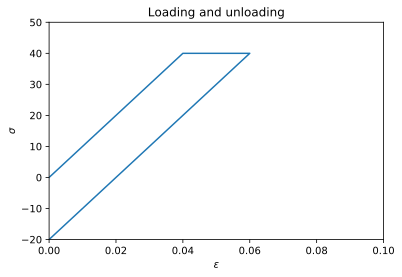

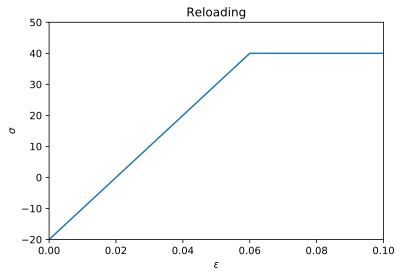

In [4]:
e_unloading = np.concatenate((np.linspace(0,0.06,100),np.linspace(0.06,0.0,100)))

pl = PerfectPlasticMaterial1D(E, f, df ,ddf)

sigma_pl = [pl(ei) for ei in e_unloading]
plt.xlim([0,0.1])
plt.ylim([-20,50])
plt.xlabel(r"$ \varepsilon $")
plt.ylabel(r"$\sigma$")
plt.title("Loading and unloading")
plt.plot(e_unloading,sigma_pl)
plt.show()

#Load again. The state of the material is still saved
sigma_pl = [pl(ei) for ei in e]
plt.xlim([0,0.1])
plt.ylim([-20,50])
plt.xlabel(r"$ \varepsilon $")
plt.ylabel(r"$\sigma$")
plt.title("Reloading")
plt.plot(e,sigma_pl)
plt.show()

## Non monotonic loading (Plastic model with hardening)

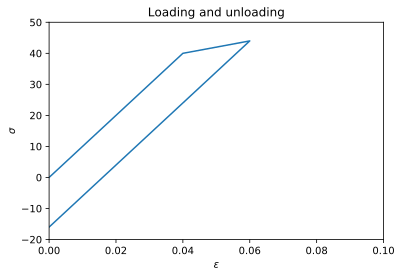

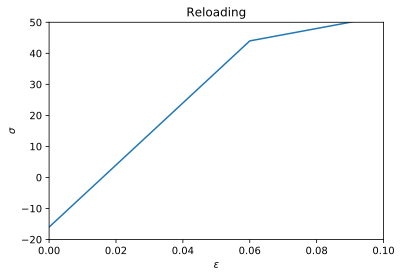

In [5]:
e_unloading = np.concatenate((np.linspace(0,0.06,100),np.linspace(0.06,0.0,100)))

pl = PlasticHardeningMaterial1D(E, 250, 40)

sigma_pl = [pl(ei) for ei in e_unloading]
plt.xlim([0,0.1])
plt.ylim([-20,50])
plt.xlabel(r"$ \varepsilon $")
plt.ylabel(r"$\sigma$")
plt.title("Loading and unloading")
plt.plot(e_unloading,sigma_pl)
plt.show()

#Load again. The state of the material is still saved
sigma_pl = [pl(ei) for ei in e]
plt.xlim([0,0.1])
plt.ylim([-20,50])
plt.xlabel(r"$ \varepsilon $")
plt.ylabel(r"$\sigma$")
plt.title("Reloading")
plt.plot(e,sigma_pl)
plt.show()

## Equation of state with perfect plasticity

For this example we consider a 3d space, but only with principal stresses and strains. In one dimension the differentiation between hydrostatic pressure and other stresses would have been useless.

We assume an energy-independent EOS with the general form 

$$
P(\mu) = K1\mu+K2\mu^2+K3\mu^3
$$

In the easiest case, $P$ is linear and we have $K1=\lambda$ the compression modulus and $K2=K3=0$.

In the following calculations we will ignore shear components of stress and strain and assume a uniaxial strain ($\sigma _{22} = \sigma_{33} =0$)

In [6]:
def sigma_dev(sigma):
    return sigma - (1/3) * np.sum(sigma)

def sigma_equiv(sigma):
    return np.sqrt((3/2)*np.sum(sigma_dev(sigma)**2))

eps_uni = np.array([1,0,0])
eps_increment = np.linspace(0,0.04,100)

E = 10000
nu = 0.3
G = E/(2*(1+nu))
K = E*nu/((1+nu)*(1-2*nu))

Linear elastic case: $P=K\cdot \mu$

In [7]:
mat_lin = EOSMaterial(G,K,YieldFunction(40))
sigma_lin = np.array([mat_lin(eps_uni*e) for e in eps_increment])

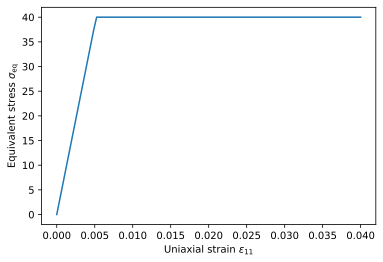

In [8]:
plt.plot(eps_increment,[sigma_equiv(sigma) for sigma in sigma_lin])
plt.xlabel("Uniaxial strain "+r"$\varepsilon_{11}$")
plt.ylabel("Equivalent stress "r"$\sigma_\mathrm{eq}$")
plt.show()

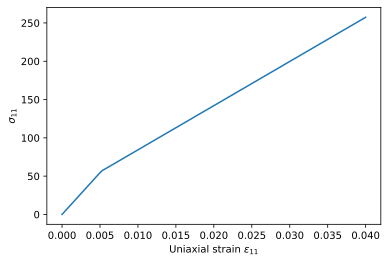

In [9]:
plt.plot(eps_increment,[sigma[0] for sigma in sigma_lin])
plt.xlabel("Uniaxial strain "+r"$\varepsilon_{11}$")
plt.ylabel(""r"$\sigma_{11}$")
plt.show()

Case with EOS

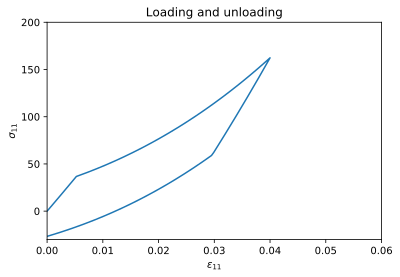

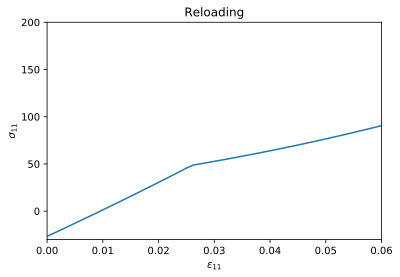

In [10]:
eps_unloading = np.concatenate((np.linspace(0,0.04,100),np.linspace(0.04,0.00,100)))
eps_reloading = np.linspace(0,0.04,100)
def P(y):
    return 0.3*( K*y + 20 * K * y**2 + 100*K*y**3)

mat_eos = EOSMaterial(G,K,YieldFunction(40),P=P)

sigma_eos = [mat_eos(eps_uni*e) for e in eps_unloading]
plt.xlim([0,0.06])
plt.ylim([-30,200])
plt.xlabel(r"$ \varepsilon_{11} $")
plt.ylabel(r"$\sigma_{11}$")
plt.title("Loading and unloading")
plt.plot(eps_unloading,[sigma[0] for sigma in sigma_eos])
plt.show()


sigma_eos = [mat_eos(eps_uni*e) for e in eps_reloading]
plt.xlim([0,0.06])
plt.ylim([-30,200])
plt.xlabel(r"$ \varepsilon_{11} $")
plt.ylabel(r"$\sigma_{11}$")
plt.title("Reloading")
plt.plot(np.linspace(0,0.1,100),[sigma[0] for sigma in sigma_eos])
plt.show()

# Drucker-Prager yield condition
First example with linear elasticity, second with EOS.

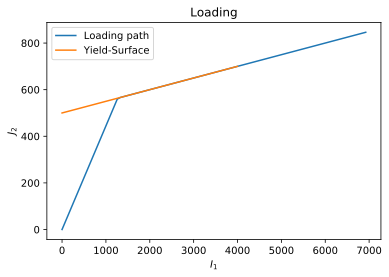

In [11]:
eps_increment = np.linspace(0,0.04,100)
E = 100000
nu = 0.3 
G = E/(2*(1+nu))
K = E*nu/((1+nu)*(1-2*nu))
A,B=500,0.05
def P(y):
    return 0.3*( K*y + 20 * K * y**2 + 100*K*y**3)
    #return np.exp(K*0.016*y)-1
pl = EOSMaterial(G,K,DruckerPragerYieldFunction(A,B),P=None)

#sigma_pl = [pl(ei)[0] for ei in e_unloading]
sigma_pl = np.array([pl(eps_uni*e) for e in eps_increment])
#plt.xlim([0,0.06])
#plt.ylim([-20,50])
plt.xlabel(r"$ I_1$")
plt.ylabel(r"$J_2$")
plt.title("Loading")
plt.plot(np.sum(sigma_pl,axis=1),[sigma_equiv(sigma) for sigma in sigma_pl], label="Loading path")
plt.plot( np.linspace(0,4000,100),A+B*np.linspace(0,4000,100),label="Yield-Surface")
plt.legend()
plt.show()

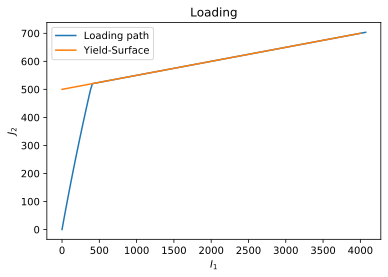

In [12]:
pl = EOSMaterial(G,K,DruckerPragerYieldFunction(A,B),P=P)

#sigma_pl = [pl(ei)[0] for ei in e_unloading]
sigma_pl = np.array([pl(eps_uni*e) for e in eps_increment])
#plt.xlim([0,0.06])
#plt.ylim([-20,50])
plt.xlabel(r"$ I_1$")
plt.ylabel(r"$J_2$")
plt.title("Loading")
plt.plot(np.sum(sigma_pl,axis=1),[sigma_equiv(sigma) for sigma in sigma_pl], label="Loading path")
plt.plot( np.linspace(0,4000,100),A+B*np.linspace(0,4000,100),label="Yield-Surface")
plt.legend()
plt.show()